change from V0:<br>
look at three points before deciding what to drop:
1. colinearity
2. features unable to normalize
3. P-value and R-squared values

<font color = 'blue'><font size = 5> **Final Project Submission**

Please fill out:
* Student name:                        Matan Gavish 
* Student pace:                        part time
* Scheduled project review date/time: 
* Instructor name:                     Joe San Pietro 
* Blog post URL:

## <font color = 'green'> Import Libraries 

In [68]:
import pandas as pd 
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None) # shows me all columns instead of truncating and dot dot dot

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from scipy.stats import kurtosis, skew
import scipy.stats as stats

from math import sqrt

import statsmodels.formula.api as smf

## <font color = 'green'> obtain our data 

In [69]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


###### observations - we can do away with id since that is some kind of internal tracking convention, liklely specific to Kings County

###### "date" is the date the home was sold; this should be more descriptive


In [71]:
df.drop(columns = 'id', inplace = True) #drop id column

In [72]:
df = df.rename({'date':'date_sold'}, axis = 1)  #rename date to date_sold
df.head(0)

,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## <font color = 'green'> Scrub

<font color = 'green'> <font size = 2> **Deal with NaN values**

In [73]:
df.isna().sum()

date_sold           0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

###### lets inspect waterfront, view and yr_renovated and decide how to handle the respective null values

###### waterfront

In [74]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [75]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

11% of values in Waterfront are NaN; feels like too much to drop.  I will replace the NaN values with zero and<br>
deal with outliers later in EDA/modeling

In [76]:
df.waterfront = df.waterfront.fillna(0)

###### view

In [77]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

view has only 63 NaN rows; will drop them

In [78]:
df = df.dropna(subset = ["view"])

###### yr_renovated

In [79]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

cannot remove 18% of data<br>
doesn't make sense to imputate<br>
will fill NaN values with zero (never been renovated) and handle outliers in EDA/modeling

In [80]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [81]:
df.isna().sum()

date_sold        0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<font color = 'green'> <font size = 5> **Correct data types**

can change to float or int, must deal with categoricals or date in EDA/modeling

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date_sold        21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


##### price

In [83]:
df.price.unique()

array([221900., 538000., 180000., ..., 594866., 541800., 402101.])

price has a decimal at end so should be an int

In [84]:
df.price = df.price.astype("int64")



view to int (categorical instead?) <br>
sqft_basement to int<br>
yr_renovated to int


##### waterfront

In [85]:
df.waterfront.unique()

array([0., 1.])

waterfront will become a category type later but for now will coerce to int

In [86]:
df.waterfront = df.waterfront.astype("int64")

##### view

In [87]:
df.view.unique()

array([0., 3., 4., 2., 1.])

view will become a category type later but for now will coerce to int.

In [88]:
df.view = df.view.astype("int64")

###### sqft_basement

In [89]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

basement feature has 452 queustion mark place-holders<br>
remove column, remove records or imputate?<br>


could delete the 452 observations since its only 2% of the dataset though, I think its reasonable to imputate<br>
with the column median, exclusing the zero values; the thinking being that if they did not have a basement, then their answer would have been an obvious zero<br>
though, they likely did not know the square footage, hence, the question mark.  I will imputate with median

###### find median value for sqft_basement after taking out the "?" and zeros 

In [90]:
df_adhoc = df[df.sqft_basement != '0.0']

In [91]:
df_adhoc = df_adhoc[df_adhoc.sqft_basement != '?']

In [92]:
df_adhoc.sqft_basement.unique()

array(['400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0', '970.0',
       '760.0', '720.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '840.0',
       '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0', '1250.0',
       '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0',
       '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0', '1430.0',
       '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0', '2060.0',
       '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0', '530.0',
       '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0', '1100.0',
       '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0', '1580.0',
       '1380.0', '475.0', '690.0', '270.0', '350.0', '93

In [93]:
df_adhoc.sqft_basement = df_adhoc.sqft_basement.astype("float64")

In [94]:
df_adhoc.sqft_basement.median()

700.0

###### median value for sqft_basement is 700; will replace all "?" with 700

In [95]:
df.sqft_basement = df.sqft_basement.replace("?", 700)

In [96]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', 700, '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date_sold        21534 non-null object
price            21534 non-null int64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null int64
view             21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(5), int64(13), object(2)
memory usage: 3.5+ MB


In [98]:
df.sqft_basement = df.sqft_basement.astype("float64")

In [99]:
df.sqft_basement = df.sqft_basement.astype("int64")

###### yr_renovated

In [100]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [101]:
df.yr_renovated = df.yr_renovated.astype("int64")

###### save cleaned data to new csv file

In [102]:
df.to_csv("cleaned_kc_housing_data.csv")


<font color = 'red'><font size = 5>***END DATA SCRUB***


## <font color = 'green'> **Begin check for multicoliniarity**

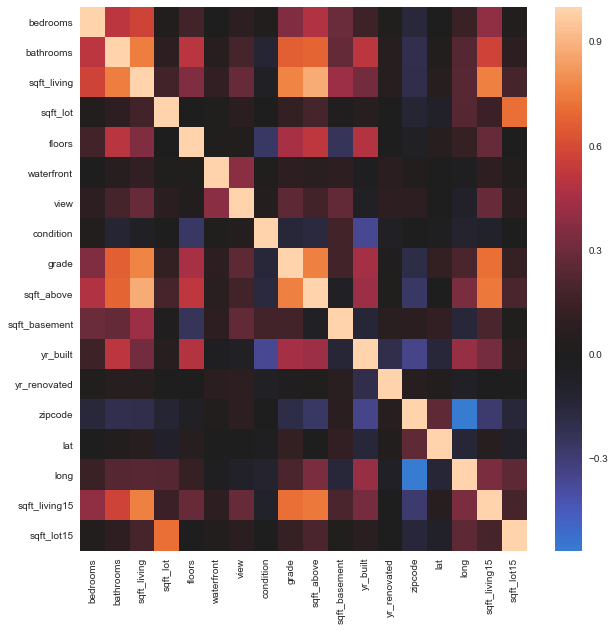

In [103]:
multi_corr_check_df = df.drop(columns = 'price')

plt.subplots(figsize=(10,10))

sns.heatmap(multi_corr_check_df.corr(), center=0);

###### seemingly colinear from heat map<br>
1. bathrooms & sqft_living
2. bathrooms & grade
3. bathrooms & sqft_above
<br>
<br>
4. sqft_living & bedrooms
5. sqft_living & grade
6. sqft_living & sqft_above
7. sqft_living & sqft_living15
<br>
<br>
8. sqft_lot & sqft_lot15
9. grade & sqft_above
10. grade & sqft_living15
11. sqft_above & sqft_living15
12. zipcode & long



In [104]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.316894,0.054273,0.117982,-0.053620,0.307868,0.022417,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,0.296325,0.155462,0.017797,-0.153990,-0.010415,0.132318,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.275965,0.507565,0.046955,-0.204435,0.024487,0.225025,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.424665,0.318217,0.050871,-0.199839,0.052383,0.241856,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,0.015519,0.052646,0.005091,-0.129846,-0.085143,0.230137,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,-0.239841,0.489410,0.003317,-0.058966,0.049419,0.125329,0.279176,-0.010850
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,0.081428,-0.025000,0.074327,0.029490,-0.012282,-0.037845,0.082352,0.030605
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.271596,-0.054564,0.090324,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,0.166911,-0.361398,-0.055730,0.002125,-0.015594,-0.105475,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.163172,0.448255,0.015235,-0.185710,0.113787,0.200821,0.713462,0.121435


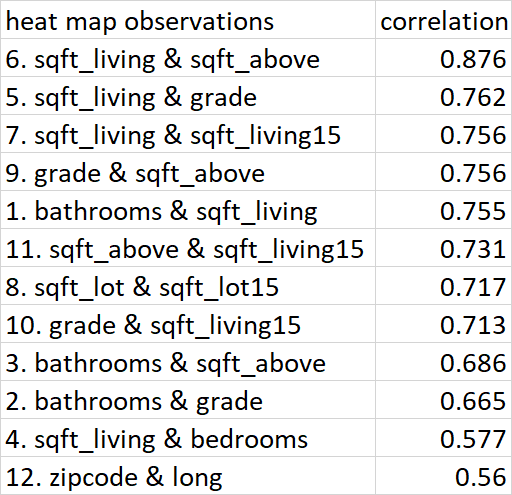

In [105]:
abs(df.corr()) > 0.70

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False


<font color = 'red'><font size = 5> **END CHECK FOR MULTICOLINEARITY**

## <font color = 'green'> **Begin EDA**

In [106]:
df.head(5)

,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [107]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,299.937355,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,441.249993,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,600.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date_sold        21534 non-null object
price            21534 non-null int64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null int64
view             21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int64
yr_built         21534 non-null int64
yr_renovated     21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 3.5+ MB


###### lets look at what we think are categorical variables and confirm our findings
###### do we need to do anything further on any of these?

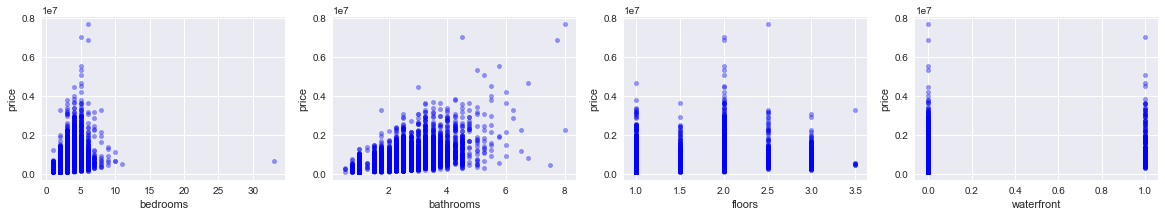

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'floors', 'waterfront'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

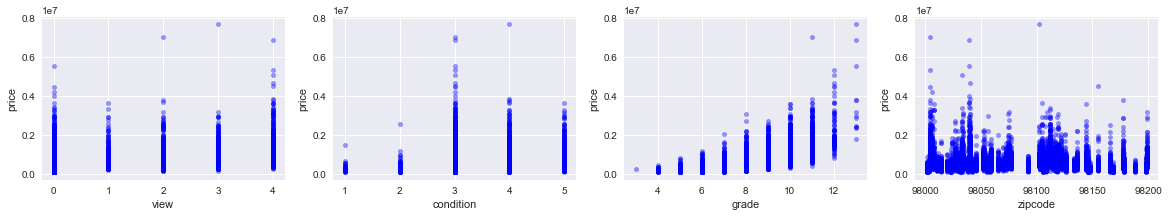

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'view', 'condition', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

lets look at bedrooms and remove outliers<br>
same for bathrooms<br>
waterfront is already binary<br>
roll zipcodes into  towns<br>

makes sense to cut some outlier observations from the bedroom and bathroom features to bring them closer to a normal distribution


###### remove outliers from categoricals

In [111]:
df = df[df.bedrooms < 10]
df = df[df.bathrooms < 5]

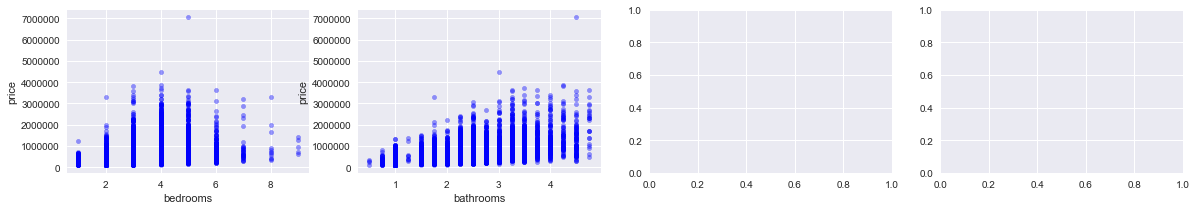

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

###### lets plot the continuous/discrete variables

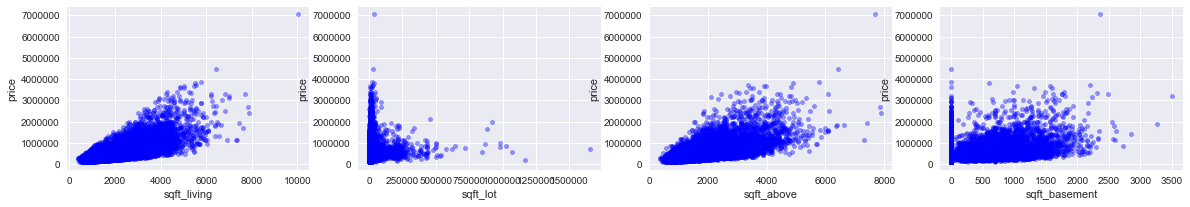

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

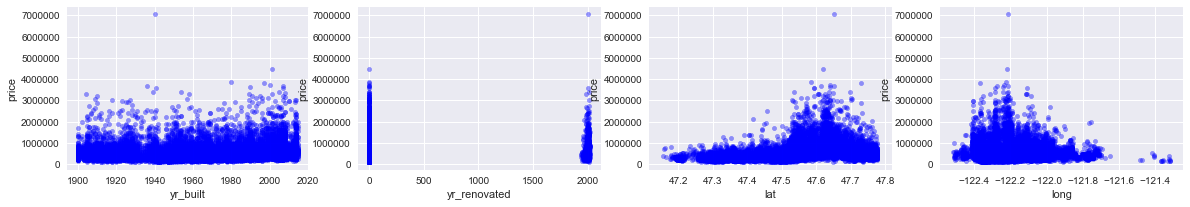

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'yr_built', 'yr_renovated', 'lat', 'long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

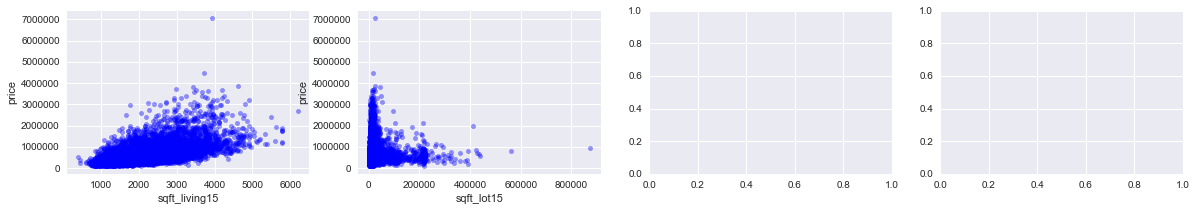

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

###### clearly we can remove outliers from almost all of these continuous features

In [116]:
df.shape

(21467, 20)

In [117]:
df = df[df.sqft_living < 6000]
df = df[df.sqft_lot < 300000]
df = df[df.sqft_above < 6000]
df = df[df.sqft_basement < 2000]
df = df[df.sqft_living15 < 5000]
df = df[df.sqft_lot15 < 300000]

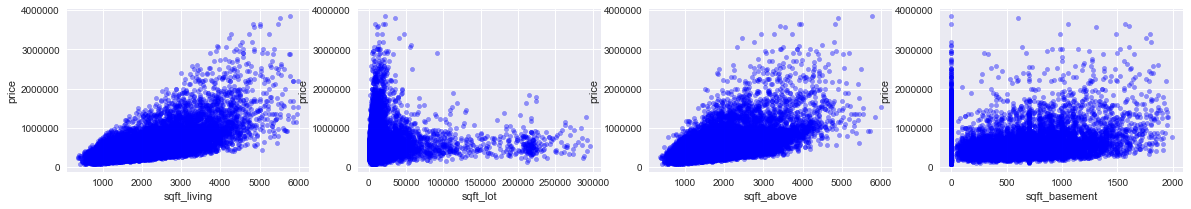

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

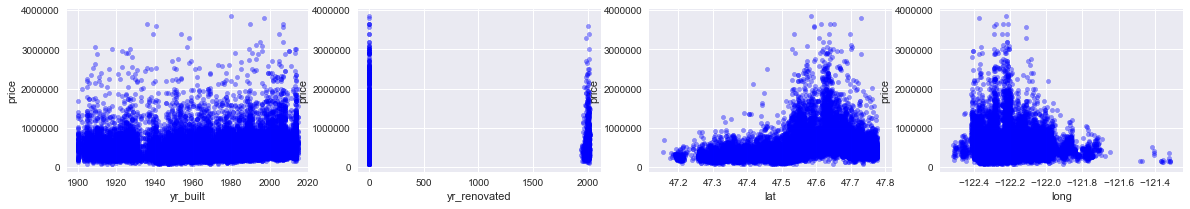

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'yr_built', 'yr_renovated', 'lat', 'long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

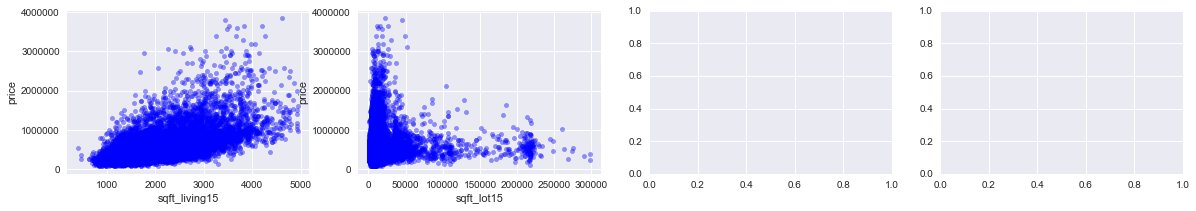

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [121]:
df.head()

,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


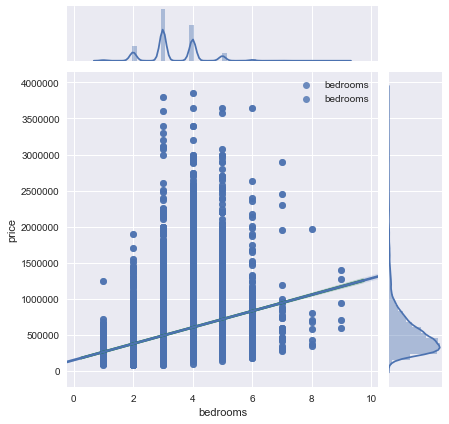

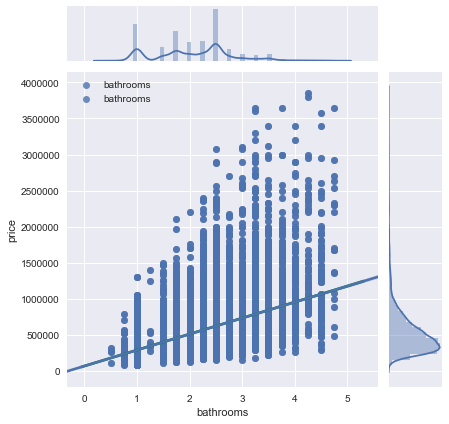

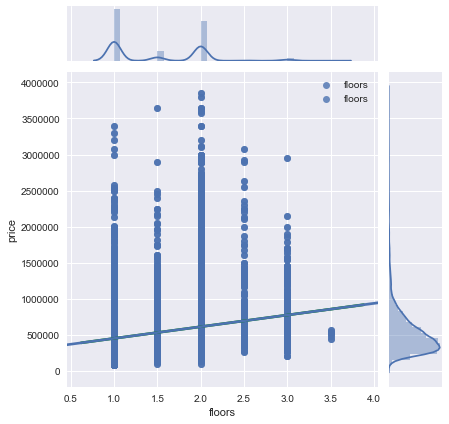

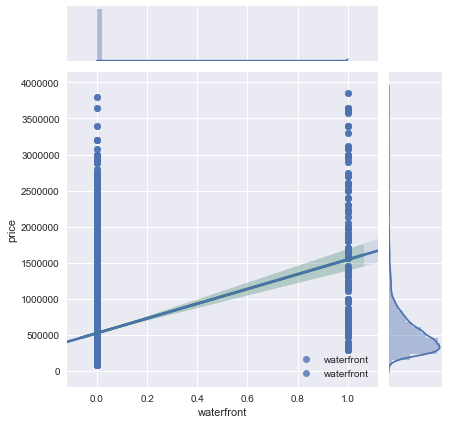

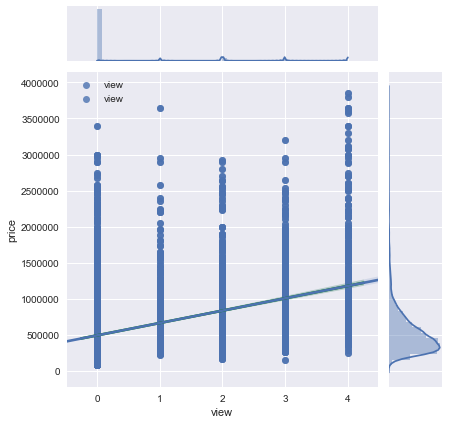

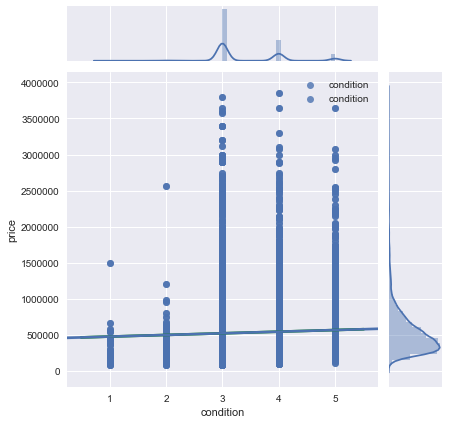

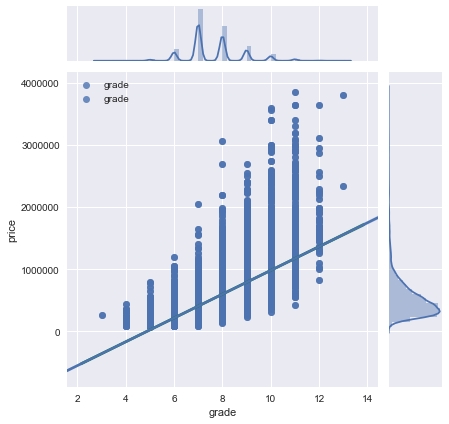

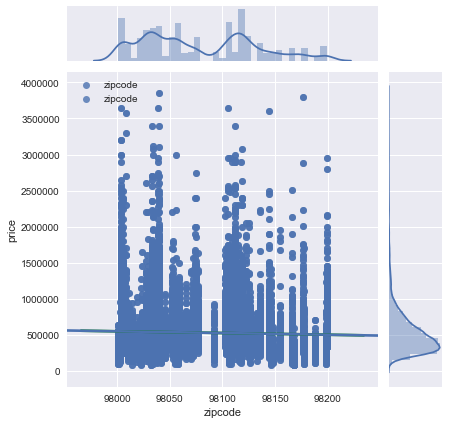

In [122]:
# joint plots for categoricals

for column in ['bedrooms', 'bathrooms', 'floors', 'waterfront','view', 'condition', 'grade', 'zipcode']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


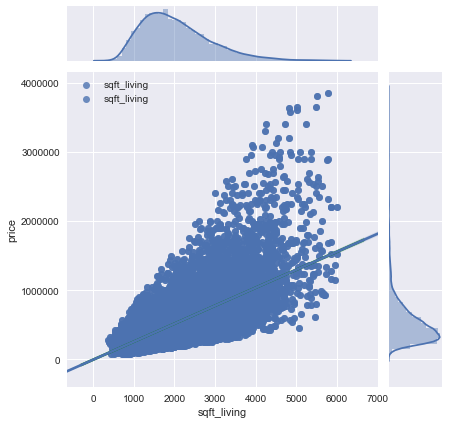

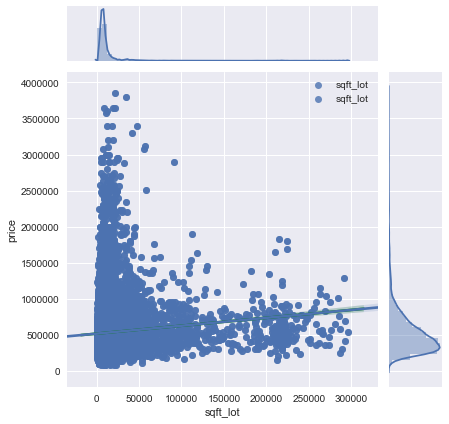

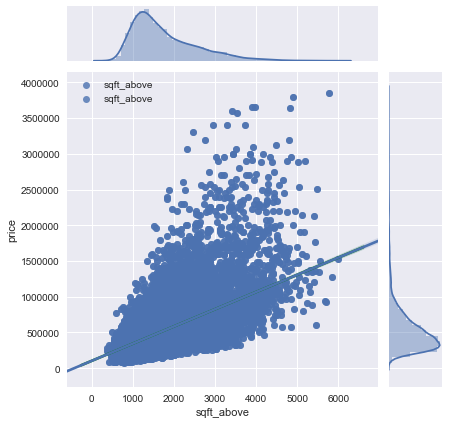

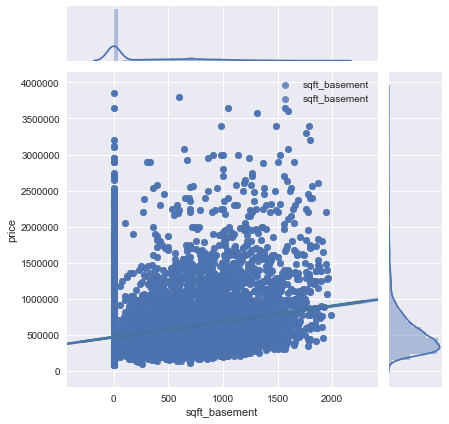

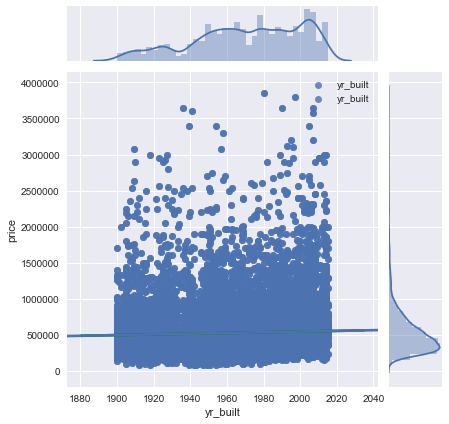

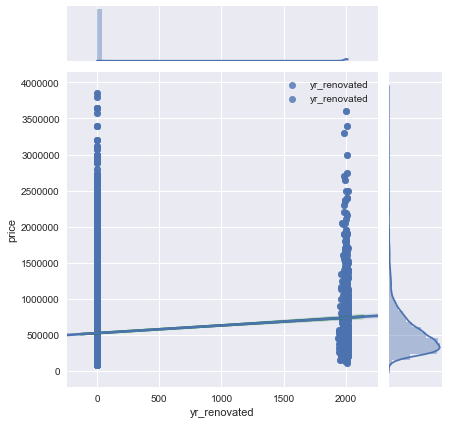

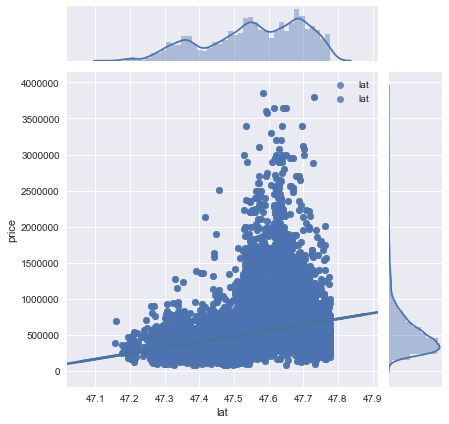

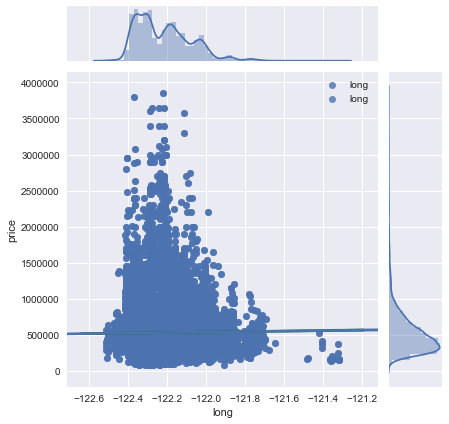

In [123]:
# joint plots for continuous

for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'lat', 'long',
              ]:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(df[column], df.price, label=column)
    plt.legend()
    plt.show()

###### take log of continuous features to see if we can normalize

In [124]:
data_log = pd.DataFrame([])

data_log["price"] = np.log(df["price"])
data_log["sqft_living"] = np.log(df["sqft_living"])
data_log["sqft_lot"] = np.log(df["sqft_lot"])
data_log["sqft_above"] = np.log(df["sqft_above"])
# data_log["sqft_basement"] = np.log(df["sqft_basement"]) # sqft_basement has many zeros; cannot take log
data_log["sqft_living15"] = np.log(df["sqft_living15"])
data_log["sqft_lot15"] = np.log(df["sqft_lot15"])





C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


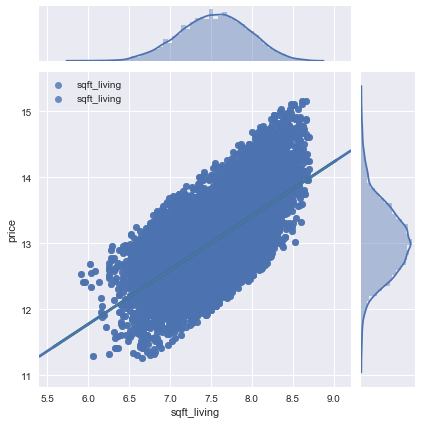

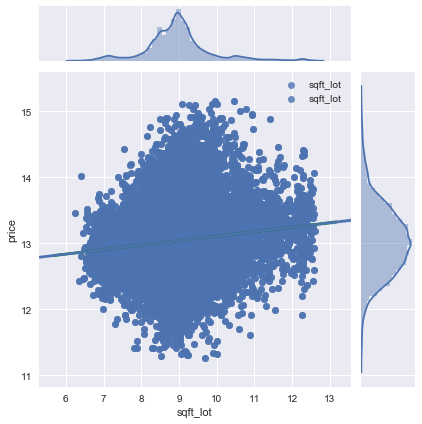

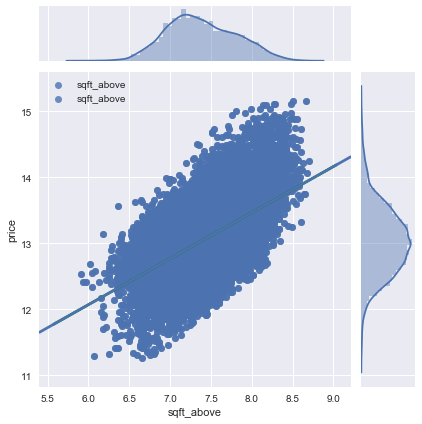

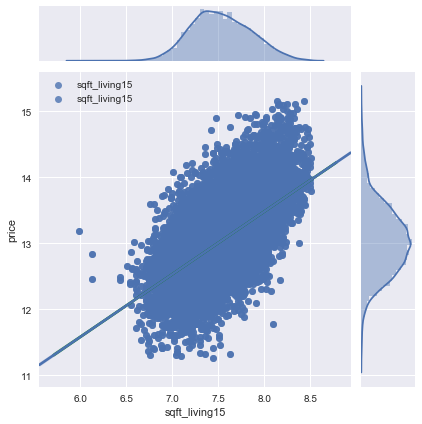

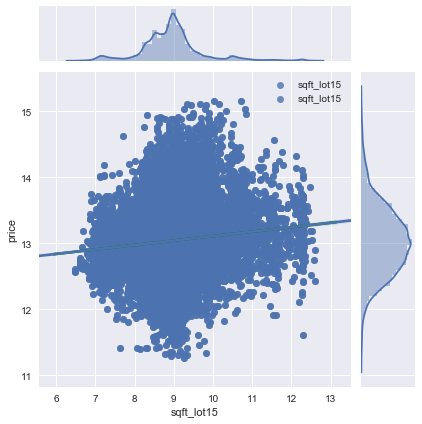

In [125]:
for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'
              ]:
    sns.jointplot(x=column, y="price",
                  data=data_log, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(data_log[column], data_log.price, label=column)
    plt.legend()
    plt.show()

Continuous variables that will not normalize:<br>
            sqft_above<br>
            sqft_living15<br>
            sqft_lot15

#### bin(?) zip codes into towns and merge with df

df1 = pd.read_csv("zipcode_town.csv")

df1.head()

### merge both dataframes on zip code and pull in town

df2 = df.merge(df1, on = "zipcode", how = "left")

df2.info()

df2.tail()

#### remove zipcode, lat and long

df = df2.drop(columns = "zipcode")

df = df.drop(columns = ['lat', 'long'])

df.info()

df.head()

<font color = 'red'><font size = 5> **END EDA**

## <font color = 'green'> **Begin Modeling**

In [139]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 4.25, 3.75, 1.25, 0.5 ])

##### isolate categoricals and run ols model 

In [127]:
cat_df = df[['date_sold', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode' ]]

In [128]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder
lb_make = LabelEncoder()  # creating variable to perform action -- why? brevity or serves a greater purpose?

In [131]:
encoded = pd.DataFrame()  # label encoded DataFrame
encoded["bedrooms"] = lb_make.fit_transform(cat_df.bedrooms)
encoded["bathrooms"] = lb_make.fit_transform(cat_df.bathrooms)
encoded["floors"] = lb_make.fit_transform(cat_df.floors)
encoded["waterfront"] = lb_make.fit_transform(cat_df.waterfront)
encoded["view"] = lb_make.fit_transform(cat_df.view)
encoded["condition"] = lb_make.fit_transform(cat_df.condition)
encoded["grade"] = lb_make.fit_transform(cat_df.grade)

encoded["price"] = df.price

 ##### use encoded df in ols model 

In [142]:
col_names = encoded.describe().drop([ 'price'],axis =1)
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Kings County: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [encoded[val].min(), encoded[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Kings County: price~bedrooms
------------------------------
['bedrooms', 0.09399369109126088, 147922.8823224556, 113436.60234628442, 0.0]
Kings County: price~bathrooms
------------------------------
['bathrooms', 0.24837928191088365, 63735.03808116415, 221829.22699105123, 0.0]
Kings County: price~floors
------------------------------
['floors', 0.07100995077890027, 286957.06518820324, 162193.46584995498, 0.0]
Kings County: price~waterfront
------------------------------
['waterfront', 0.060922621705056024, 522471.8263192733, 1020967.803310369, 7.486125503487081e-293]
Kings County: price~view
------------------------------
['view', 0.15229831915391845, 490678.5475580601, 171687.81731066704, 0.0]
Kings County: price~condition
------------------------------
['condition', 0.002025940857047659, 451482.50150334963, 22716.514233217167, 5.052487556906907e-11]
Kings County: price~grade
------------------------------
['grade', 0.44134524381222817, -933220.2338399554, 191556.58348352334, 0.0]


In [143]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0939937,147923,113437,0
2,bathrooms,0.248379,63735,221829,0
3,floors,0.07101,286957,162193,0
4,waterfront,0.0609226,522472,1.02097e+06,7.48613e-293
5,view,0.152298,490679,171688,0
6,condition,0.00202594,451483,22716.5,5.05249e-11
7,grade,0.441345,-933220,191557,0


##### categorical ols model observations
    *looking at p-value, cant trust 'waterfront' or 'condition' 
    *looking at R-squared, condition also stands out

##### isolate continuous and complete ols model

In [144]:
cont_df = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 
             'sqft_living15', 'sqft_lot15']]

In [145]:
col_names = cont_df.describe().drop([ 'price'],axis =1)
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Kings County: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [cont_df[val].min(), cont_df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Kings County: price~sqft_living
------------------------------
['sqft_living', 0.45318154991538906, -3897.0035979218155, 260.0393934228147, 0.0]
Kings County: price~sqft_lot
------------------------------
['sqft_lot', 0.007398738546277928, 514496.45956974477, 1.0973366152558024, 3.0420492158776274e-36]
Kings County: price~sqft_above
------------------------------
['sqft_above', 0.3323918725896763, 103655.89099168604, 240.71362592245472, 0.0]
Kings County: price~sqft_basement
------------------------------
['sqft_basement', 0.07666146683050756, 466148.20636084623, 215.70563507225648, 0.0]
Kings County: price~yr_built
------------------------------
['yr_built', 0.001897188900208735, -430648.10657183034, 486.89112802892305, 2.0572927783719044e-10]
Kings County: price~yr_renovated
------------------------------
['yr_renovated', 0.013923993171472304, 521660.77444117115, 106.88529317977886, 7.381532628466526e-67]
Kings County: price~lat
------------------------------
['lat', 0.11308251683263

In [146]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.453182,-3897,260.039,0
2,sqft_lot,0.00739874,514496,1.09734,3.04205e-36
3,sqft_above,0.332392,103656,240.714,0
4,sqft_basement,0.0766615,466148,215.706,0
5,yr_built,0.00189719,-430648,486.891,2.05729e-10
6,yr_renovated,0.013924,521661,106.885,7.38153e-67
7,lat,0.113083,-3.74136e+07,797774,0
8,long,0.000217879,4.7605e+06,34623.8,0.0312883
9,sqft_living15,0.345307,-42891.6,289.806,0


##### continuous ols output observations:

P values that stand out:<br>
    sqft_lot<br>
    yr_built<br>
    yr_renovated<br>
    long<br>
    sqft_lot15<br>
    <br>
R-squared values that stand out:<br>
    sqft_living<br>
    sqft_above<br>
    long<br>
    sqft_living15<br>
 

# conclusions

mulitcolinear concerns:<br>
1. sqft_living & sqft_above
2. sqft_living & grade
3. sqft_living & sqft_living15
4. sqft_living & bathrooms
5. grade & sqft_above
6. sqft_lot & sqft_lot15





concerns from EDA; cannot normalize:
1. sqft_above
2. sqft_living15
3. sqft_lot15

also:
1. lat and long are good for building maps but no use in predicing price here; can remove
2. zipcode doesnt matter so much as town so, will bin zipcodes into towns

modeling:
<br>
P-values that are concerning:
1. waterfront
2. condition
3. sqft_lot
4. yr_built
5. yr_renovated
6. long
7. sqft_lot15

R-squared values that are concerning:
1. condition
2. sqft_living
3. sqft_above
4. long
5. sqft_lving15

###### Features to drop

1. sqft_living
2. sqft_above
3. sqft_living15
4. sqft_lot15
5. waterfront
6. condition
7. sqft_lot
8. yr_built
9. yr_renovated
10. long

